In [32]:
from google.colab import drive

drive.mount('/content/gdrive')

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


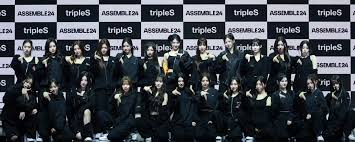

In [33]:
img=cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/chapter01/test1.jfif')
cv2_imshow(img)

(512, 512, 3)


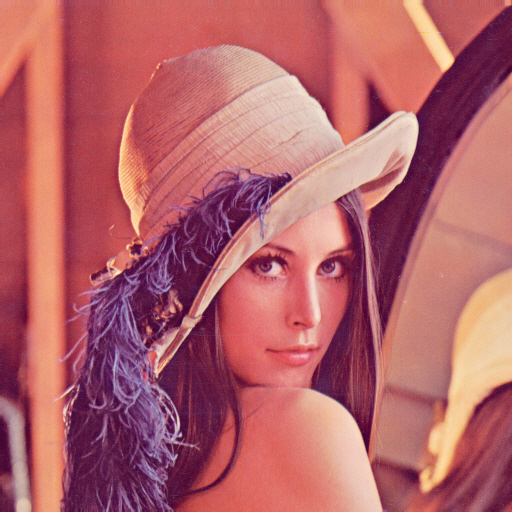

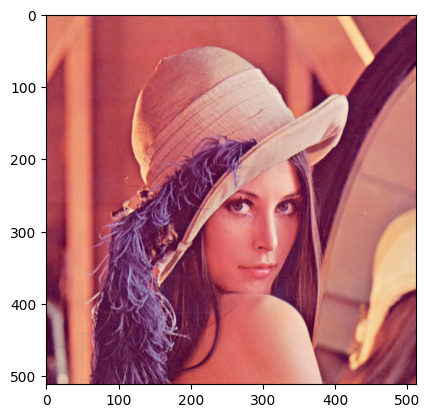

In [34]:
img2 = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/lena.jpg')
print(img2.shape)
cv2_imshow(img2)
RGB_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

(512, 512)


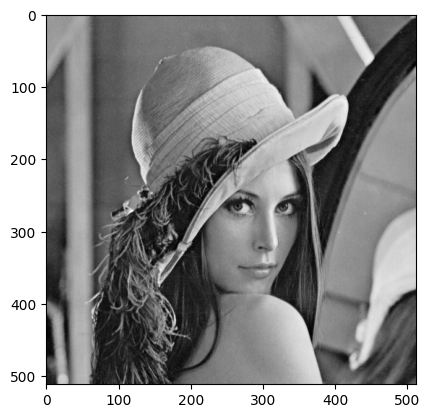

In [35]:
Gray_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
#plt.imshow(Gray_img, cmap='gray')
print(Gray_img.shape)
plt.imshow(Gray_img, cmap='gray')

나머지 연산을 통한 이미지 변환

In [36]:
gOutimg = np.zeros((Gray_img.shape[0], Gray_img.shape[1]))
#gOutimg = np.zeros((Gray_img.shape[0], Gray_img.shape[1])

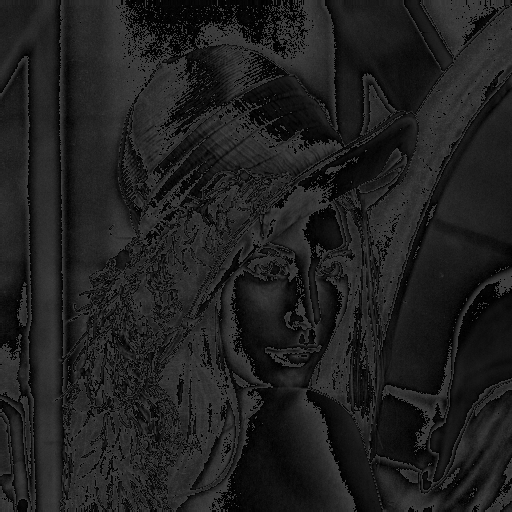

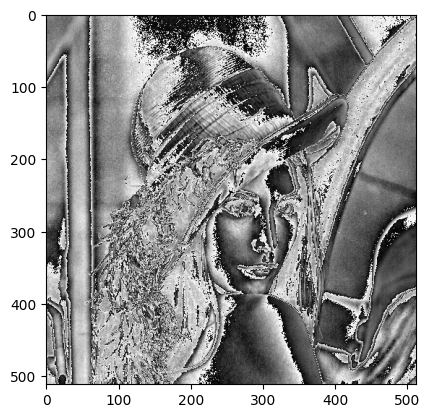

In [37]:
for h in range(Gray_img.shape[0]):
  for w in range(Gray_img.shape[1]):
    val = Gray_img[h, w] % 64 # 나머지 연산
    gOutimg[h, w] = val


plt.imshow(gOutimg, cmap='gray') # 대비가 개선된 이미지
cv2_imshow(gOutimg) # 원본에 가까운 이미지

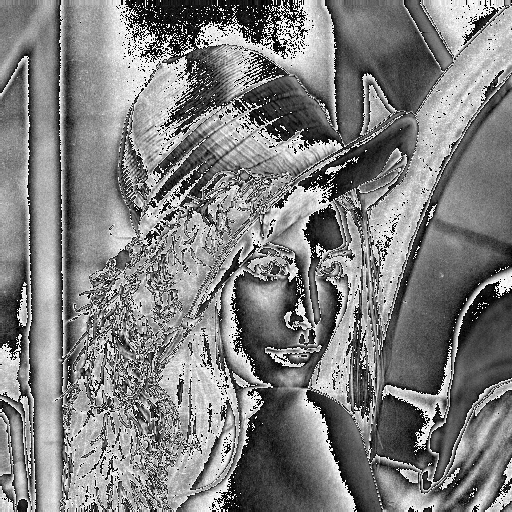

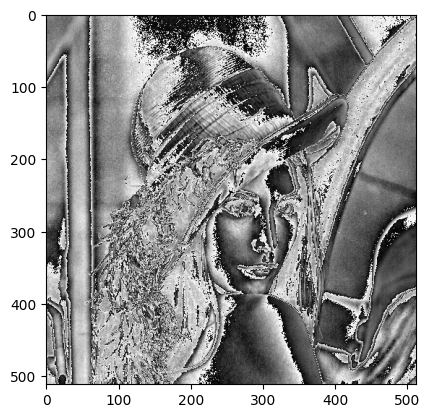

In [38]:
for h in range(Gray_img.shape[0]):
  for w in range(Gray_img.shape[1]):
    val = Gray_img[h, w] % 64 # 나머지 연산
    val = val * 4
    gOutimg[h, w] = val


plt.imshow(gOutimg, cmap='gray') # 대비가 개선된 이미지
cv2_imshow(gOutimg) # 원본에 가까운 이미지

(256, 256, 3)


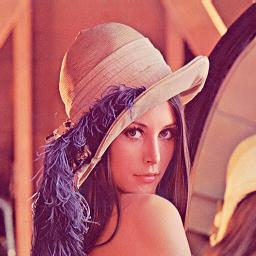

In [39]:
lena_img = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/lena256.jpg')
print(lena_img.shape)
cv2_imshow(lena_img)
#

동일한 명암값을 갖는 점들의 경계선 - 등명암 윤곽화

In [40]:
equalVal = 200
width = 5

min = equalVal - width
max = equalVal + width # 128을 기준으로 폭이 11

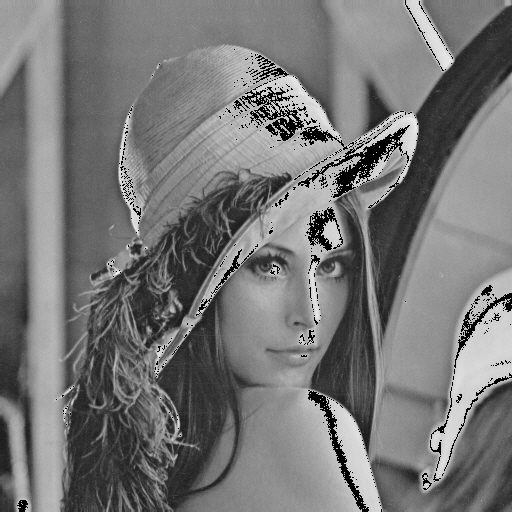

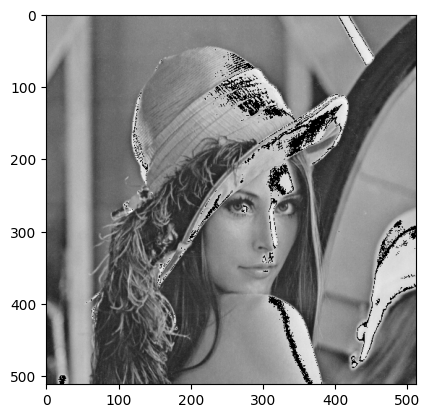

In [41]:
for h in range(Gray_img.shape[0]):
  for w in range(Gray_img.shape[1]):
    if(Gray_img[h, w] > min and Gray_img[h, w] < max):
      gOutimg[h, w] = 0
    else:
        gOutimg[h, w] = Gray_img[h, w]

plt.imshow(gOutimg, cmap='gray')
cv2_imshow(gOutimg)

파라볼라

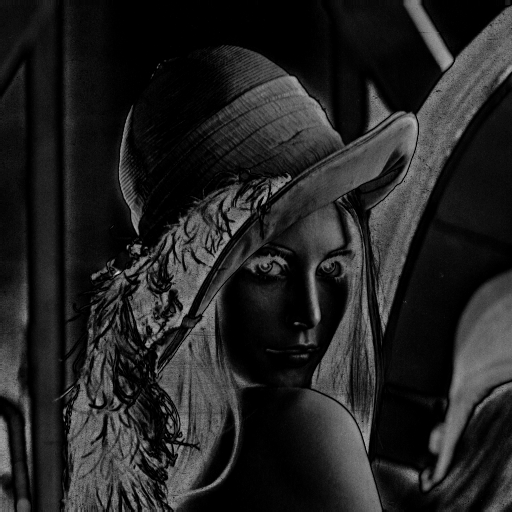

In [42]:
for h in range(Gray_img.shape[0]):
  for w in range(Gray_img.shape[1]):
    val = 255*(Gray_img[h, w]/128 -1)*(Gray_img[h, w]/128 -1)
    gOutimg[h, w] = val

plt.imshow(gOutimg, cmap='gray')
cv2_imshow(gOutimg)

비트 평면 분할

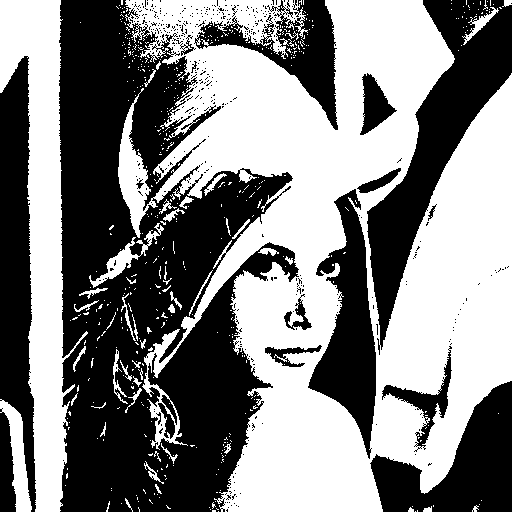

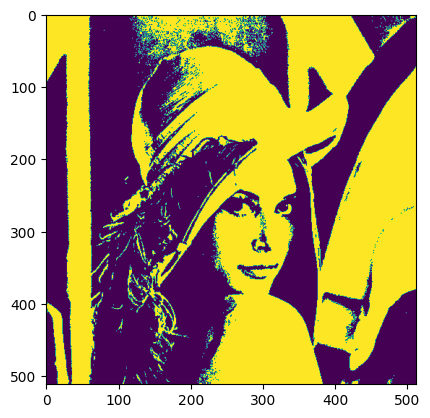

In [43]:
#최상위 비트의 비트 평면 영상
for h in range(Gray_img.shape[0]):
  for w in range(Gray_img.shape[1]):
    inVal = (int)(Gray_img[h, w] / 128) # 8번째 비트가 1인 것 뽑아내기
    if(inVal == 0):
        gOutimg[h, w] = inVal
    else:
        gOutimg[h, w] = 255

cv2_imshow(gOutimg)
plt.imshow(gOutimg)

In [50]:
planeNum = 1
planeValue = 1

for i in range(planeNum-1):
    planeValue = planeValue * 2

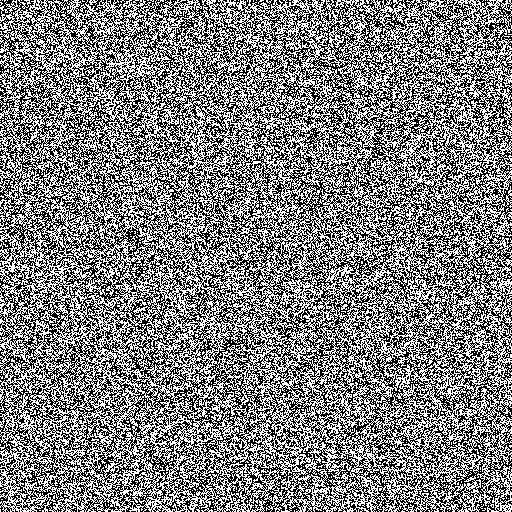

In [52]:

for h in range(Gray_img.shape[0]):
  for w in range(Gray_img.shape[1]):
    inVal = (int)(Gray_img[h, w] / planeValue)
    if(inVal % 2 == 0):
        gOutimg[h, w] = 0
    else:
        gOutimg[h, w] = 255

cv2_imshow(gOutimg)
plt.imshow(gOutimg, cmap='gray')

최하위 비트에 워터마크 삽입 실습

(286, 322)


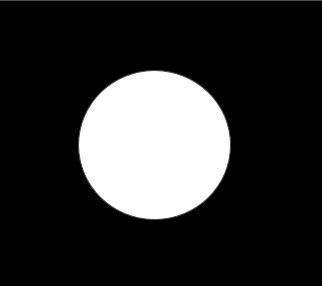

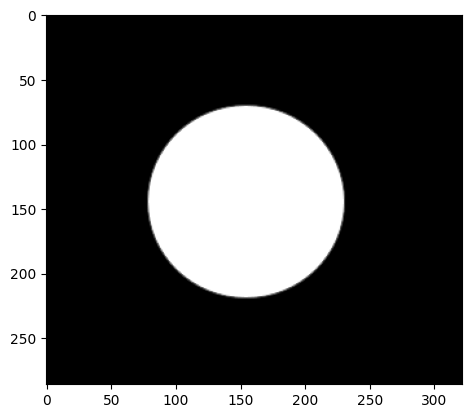

In [92]:
# 워터마크로 사용할 사진 불러오기
img2 = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/circle.bmp')
#print(img2.shape)
cv2_imshow(img2)

Gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#RGB_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(Gray_img2.shape)
cv2_imshow(Gray_img2)
plt.imshow(Gray_img2, cmap='gray')

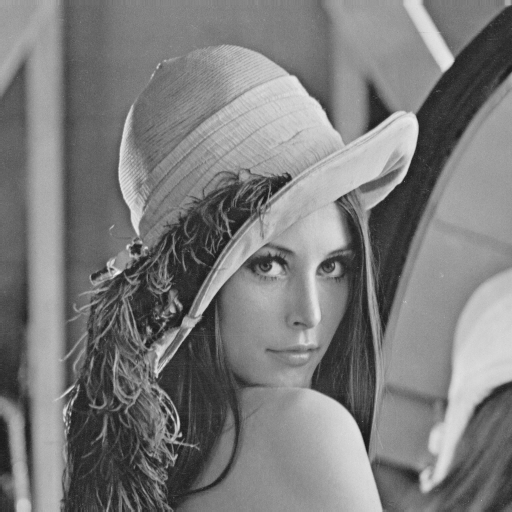

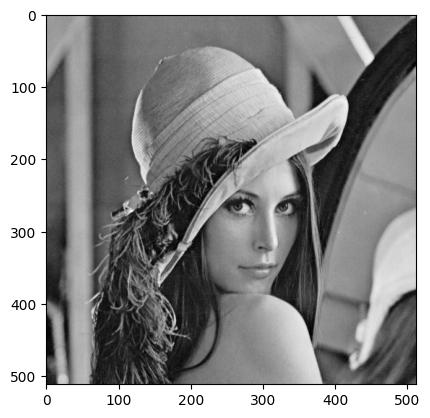

In [105]:
gWaterMarker = Gray_img.copy() # 복사본 생성

for h in range(Gray_img2.shape[0]):
  for w in range(Gray_img2.shape[1]):
    imVal = Gray_img2[h, w]
    if (imVal > 128):
        if(Gray_img[h, w] % 2 == 0):
            gWaterMarker[h, w] += 1 # 0이었던 값을 1로 변경
    else:
        if(Gray_img[h, w] % 2 == 1):
            gWaterMarker[h, w] -= 1 # 1이었던 값을 0으로 변경


cv2_imshow(gWaterMarker)
plt.imshow(gWaterMarker, cmap='gray')
#

In [106]:
planeNum = 1
planeValue = 1

for i in range(planeNum-1):
    planeValue = planeValue * 2

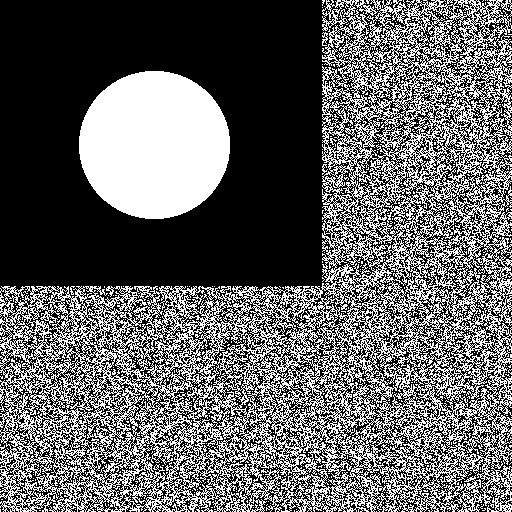

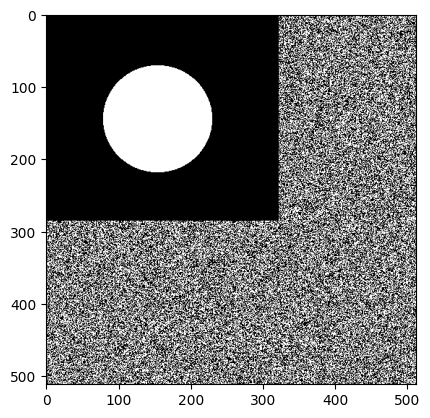

In [107]:
for h in range(gWaterMarker.shape[0]):
  for w in range(gWaterMarker.shape[1]):
    inVal = (int)(gWaterMarker[h, w] / planeValue)
    if(inVal % 2 == 0):
        gOutimg[h, w] = 0
    else:
        gOutimg[h, w] = 255

cv2_imshow(gOutimg)
plt.imshow(gOutimg, cmap='gray')